In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #not used?
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
import datetime
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import time


%matplotlib inline

import MTLibrary

D:\DProgramFiles\python3Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
OUTPUT_DATA_DIR = "D:/2017_working/unearthed/digital_tribes_Houston/output/"


INPUT_DATA_DIR = "D:/2017_working/unearthed/digital_tribes_Houston/"
input_file1 = "Hackathon_DataSet_OctApr_Part1.txt"
input_file2 = "Hackathon_DataSet_OctApr_Part2.txt"

In [3]:
df1 = pd.read_table(INPUT_DATA_DIR+input_file1, sep='\t', header=0)
df2 = pd.read_table(INPUT_DATA_DIR+input_file2, sep='\t', header=0)


In [4]:
print ("df1:", type(df1), df1.shape)
print ("df2:", type(df1), df1.shape)

df1: <class 'pandas.core.frame.DataFrame'> (469441, 41)
df2: <class 'pandas.core.frame.DataFrame'> (469441, 41)


In [5]:
df1.head(2)

,Id,hackathon4,TimeStamp,05-PT-28201-01_B2_Manifold_Pressure (Psi),05-PT-28201-03_B2_Manifold_Pressure (Psi),05-PT-29101-02_C1_Manifold_Pressure (Psi),05-PT-29101-03_C1_Manifold_Pressure (Psi),05-PT-33101-02_G1_Manifold_Pressure (Psi),05-PT-33101-03_G1_Manifold_Pressure (Psi),05-PT-34101-01_H1_Manifold_Pressure (Psi),...,20-TT-10105.PV_Subsea_Flowline_To_Train_1 (Deg.F),20-TT-10205.PV_Subsea_Flowline_Test_Sep (Deg.F),20-TT-20105.PV_Train_2_Subsea_Flowline_Launcher (Deg.F),20-TT-20205.PV_Train_2_Subsea_Flowline_Receiver (Deg.F),20-ZT-10104.PV_To/From_Subsea_Flowline (%),20-ZT-10204.PV_To/From_Subsea_Flowline (%),20-ZT-20104.PV_Train_2_Subsea_Flowline_Launcher (%),20-ZT-20204.PV_Train_2_Subsea_Flowline_Receiver (%),PIIntTSTicks,PIIntShapeID
0,1,hackathon4,10/20/2016 12:00:00 AM,966.381897,1004.695740,1754.83667,911.066284,1061.527222,1025.542603,958.443115,...,73.808342,82.281929,116.434654,114.158974,72.742256,51.437511,1.070380,1.779706,636125364000000000,0
1,2,hackathon4,10/20/2016 12:00:30 AM,966.362854,1004.681519,1754.71460,911.771423,1061.473511,1025.534912,958.766968,...,73.220024,82.265350,116.361168,114.222717,72.740173,51.435875,1.071281,1.779657,636125364300000000,0


In [6]:
df2.head(2)

,Id,hackathon4,TimeStamp,21-FQI-10518-01.NetRate.PV (BPD),21-FT-40518-03_Density_(Coriolis) (g/cc),21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d),21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%),21-HY-40534.OUT_Test_Separator_Inlet (%),21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%),21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%),...,30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),PIIntTSTicks,PIIntShapeID
0,1,hackathon4,10/20/2016 12:00:00 AM,11546.126953,0.840992,39545.699219,30.5,100.0,30.0,0.0,...,9.768112,9.703619,0.965848,42.564075,3.296184,2.667331,0.0,-1.208175,636125364000000000,0
1,2,hackathon4,10/20/2016 12:00:30 AM,12254.705078,0.840978,38541.804688,30.5,100.0,30.0,0.0,...,9.773479,9.755747,0.965457,42.561581,3.255860,2.631529,0.0,-0.869427,636125364300000000,0


In [7]:
#drop useless columns
df1.drop(labels=['Id', 'hackathon4', 'PIIntTSTicks', 'PIIntShapeID'], axis=1, inplace=True)
df2.drop(labels=['Id', 'hackathon4', 'PIIntTSTicks', 'PIIntShapeID'], axis=1, inplace=True)
#nb: these columns identified during inspection &/or plotting below.

In [8]:
print ("df1:", type(df1), df1.shape)
print ("df2:", type(df2), df2.shape)

df1: <class 'pandas.core.frame.DataFrame'> (469441, 39)
df2: <class 'pandas.core.frame.DataFrame'> (469441, 49)


In [9]:
colnames1 = list(df1)
colnames1

['TimeStamp',
 '05-PT-28201-01_B2_Manifold_Pressure (Psi)',
 '05-PT-28201-03_B2_Manifold_Pressure (Psi)',
 '05-PT-29101-02_C1_Manifold_Pressure (Psi)',
 '05-PT-29101-03_C1_Manifold_Pressure (Psi)',
 '05-PT-33101-02_G1_Manifold_Pressure (Psi)',
 '05-PT-33101-03_G1_Manifold_Pressure (Psi)',
 '05-PT-34101-01_H1_Manifold_Pressure (Psi)',
 '05-PT-34101-04_H1_Manifold_Pressure (Psi)',
 '05-TT-28201-01_B2_Manifold_Temperature (DegF)',
 '05-TT-28201-03_B2_Manifold_Temperature (DegF)',
 '05-TT-29101-02_C1_Manifold_Temperature (DegF)',
 '05-TT-29101-03_C1_Manifold_Temperature (DegF)',
 '05-TT-33101-02_G1_Manifold_Temperature (DegF)',
 '05-TT-33101-03_G1_Manifold_Temperature (DegF)',
 '05-TT-34101-01_H1_Manifold_Temperature (DegF)',
 '05-TT-34101-04_H1_Manifold_Temperature (DegF)',
 '20-HX-10003.Status_Flowline_From_Drill_Center_C ( )',
 '20-HX-10004.Status_Flowline_From_Drill_Center_C ( )',
 '20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( )',
 '20-HX-20004.Status_Flowline_From_Drill_Center

In [10]:
#check for nulls.

null_count1 = df1.isnull().sum()
#print ("null_count1:\n", null_count1)
print ("total nulls1:", null_count1.sum())

null_count2 = df2.isnull().sum()
#print ("null_count2:\n", null_count2)
print ("total nulls2:", null_count2.sum())

#result is zero nulls, this is good. Thanks for clean data BHP.

total nulls1: 0
total nulls2: 0


In [11]:
df1.dtypes

TimeStamp                                                     object
05-PT-28201-01_B2_Manifold_Pressure (Psi)                    float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                    float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                    float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                    float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                    float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                    float64
05-PT-34101-01_H1_Manifold_Pressure (Psi)                    float64
05-PT-34101-04_H1_Manifold_Pressure (Psi)                    float64
05-TT-28201-01_B2_Manifold_Temperature (DegF)                float64
05-TT-28201-03_B2_Manifold_Temperature (DegF)                float64
05-TT-29101-02_C1_Manifold_Temperature (DegF)                float64
05-TT-29101-03_C1_Manifold_Temperature (DegF)                float64
05-TT-33101-02_G1_Manifold_Temperature (DegF)                float64
05-TT-33101-03_G1_Manifold_Tempera

In [12]:
dirty_cols1 = [ '20-HX-10003.Status_Flowline_From_Drill_Center_C ( )', 
                '20-HX-10004.Status_Flowline_From_Drill_Center_C ( )',
                '20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( )',
                '20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( )']
df1[dirty_cols1].head(4)

,20-HX-10003.Status_Flowline_From_Drill_Center_C ( ),20-HX-10004.Status_Flowline_From_Drill_Center_C ( ),20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ),20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( )
0,Closed,Open,Open,FAIL
1,Closed,Open,Open,FAIL
2,Closed,Open,Open,FAIL
3,Closed,Open,Open,FAIL


In [13]:
for colname in dirty_cols1:
    print (colname,":", df1[colname].unique())
    df1[colname] =  df1[colname].astype('category').cat.codes
    print (df1[colname].dtypes)
    print(df1[colname].iloc[0:5])
    


20-HX-10003.Status_Flowline_From_Drill_Center_C ( ) : ['Closed' 'Open' 'FAIL']
int8
0    0
1    0
2    0
3    0
4    0
Name: 20-HX-10003.Status_Flowline_From_Drill_Center_C ( ), dtype: int8
20-HX-10004.Status_Flowline_From_Drill_Center_C ( ) : ['Open' 'Closed' 'FAIL']
int8
0    2
1    2
2    2
3    2
4    2
Name: 20-HX-10004.Status_Flowline_From_Drill_Center_C ( ), dtype: int8
20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ) : ['Open' 'Closed' 'FAIL']
int8
0    2
1    2
2    2
3    2
4    2
Name: 20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ), dtype: int8
20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( ) : ['FAIL' 'Open' 'Closed']
int8
0    1
1    1
2    1
3    1
4    1
Name: 20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( ), dtype: int8


In [14]:
scaler = MinMaxScaler()
scaler.fit(df1.drop('TimeStamp', axis=1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
print(scaler.data_max_)

[  1.92128442e+03   1.83194104e+03   2.39363647e+03   2.95467847e+03
   1.85049854e+03   1.93510144e+03   1.87481602e+04   1.09263105e+04
   1.70198975e+02   1.54861786e+02   1.30832336e+02   1.23530373e+02
   1.65019150e+02   1.40628830e+02   1.06940849e+02   1.94133011e+02
   2.00000000e+00   2.00000000e+00   2.00000000e+00   2.00000000e+00
   9.21571838e+02   1.49586243e+03   1.61385413e+03   3.51739941e+03
   1.92758875e+03   1.61644458e+03   6.71389587e+02   5.05846039e+02
   1.32182312e+02   8.48986282e+01   1.29220657e+02   1.23171638e+02
   7.28767471e+01   1.00811836e+02   1.17950273e+00   2.29330063e+00
   6.36266196e+17   0.00000000e+00]


In [16]:
scaled_df1 = scaler.transform(df1.drop('TimeStamp', axis=1))

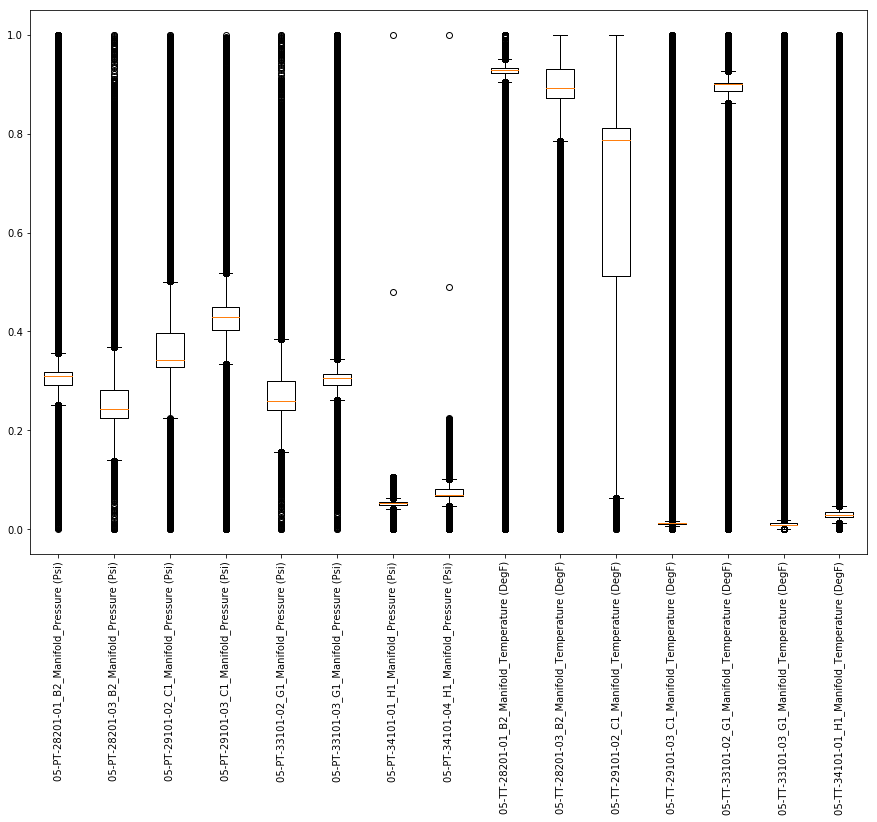

In [17]:
# basic plot
rcParams['figure.figsize'] = 15, 10
plt.boxplot(scaled_df1[:, 0:15], labels=colnames1[1:16])
plt.xticks(rotation=90)
plt.show()

In [18]:
#redundant since use pandas.to_datetime to convert column
#import datetime
#print (datetime.datetime.strptime('10/20/2016 12:04:05 AM', "%m/%d/%Y %I:%M:%S %p"))


In [19]:
df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])

In [20]:
df2['TimeStamp'] = pd.to_datetime(df2['TimeStamp'])

In [21]:
#df1.dtypes

In [22]:
type(df1['TimeStamp'].iloc[0]), df1['TimeStamp'].iloc[0]

(pandas._libs.tslib.Timestamp, Timestamp('2016-10-20 00:00:00'))

In [23]:
#Background – Separation Upset Dates 
#October 26, 2016
start_date = '2016-10-25'
end_date = '2016-10-27'

In [24]:
mask = (df1['TimeStamp'] > start_date) & (df1['TimeStamp'] <= end_date)

In [25]:
df_incident = df1.loc[mask]
df_incident.shape

(5760, 39)

In [26]:
#list(df_incident)

In [27]:
#MTLibrary.separator_2nd_features

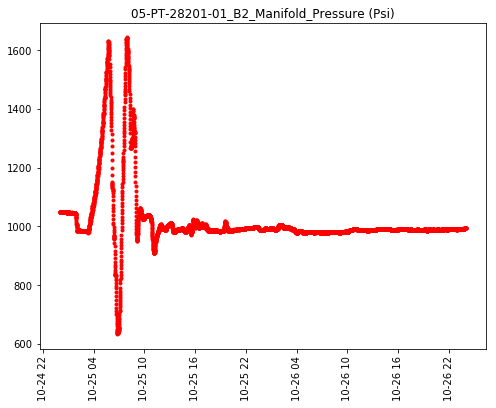

In [28]:
#plt.boxplot(df_incident['21-PT-10505.PV_Production_Separator (PSIG)'].values)
rcParams['figure.figsize'] = 8, 6
plt.plot_date(df_incident['TimeStamp'], df_incident[colnames1[1]], marker=".", c='r')
plt.xticks(rotation=90)
plt.title(colnames1[1])
plt.show()

#nb: rewrite to use EDA.plot_features method.

In [29]:
#print (df1.shape)
#df1.drop(['PIIntTSTicks', 'PIIntShapeID'], axis=1, inplace=True)
#print (df1.shape)

(469441, 39)
(469441, 37)


In [30]:
df1_5min = df1.groupby(np.arange(len(df1))//10).mean()
print ("original shape:", df1.shape, ", new shape:", df1_5min.shape)


original shape: (469441, 37) , new shape: (46945, 36)


In [31]:
list(df1_5min)

['05-PT-28201-01_B2_Manifold_Pressure (Psi)',
 '05-PT-28201-03_B2_Manifold_Pressure (Psi)',
 '05-PT-29101-02_C1_Manifold_Pressure (Psi)',
 '05-PT-29101-03_C1_Manifold_Pressure (Psi)',
 '05-PT-33101-02_G1_Manifold_Pressure (Psi)',
 '05-PT-33101-03_G1_Manifold_Pressure (Psi)',
 '05-PT-34101-01_H1_Manifold_Pressure (Psi)',
 '05-PT-34101-04_H1_Manifold_Pressure (Psi)',
 '05-TT-28201-01_B2_Manifold_Temperature (DegF)',
 '05-TT-28201-03_B2_Manifold_Temperature (DegF)',
 '05-TT-29101-02_C1_Manifold_Temperature (DegF)',
 '05-TT-29101-03_C1_Manifold_Temperature (DegF)',
 '05-TT-33101-02_G1_Manifold_Temperature (DegF)',
 '05-TT-33101-03_G1_Manifold_Temperature (DegF)',
 '05-TT-34101-01_H1_Manifold_Temperature (DegF)',
 '05-TT-34101-04_H1_Manifold_Temperature (DegF)',
 '20-HX-10003.Status_Flowline_From_Drill_Center_C ( )',
 '20-HX-10004.Status_Flowline_From_Drill_Center_C ( )',
 '20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( )',
 '20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( )',
 '

In [32]:
colnames1[0]

'TimeStamp'

In [33]:
temp1 = df1[df1.index % 10 == 0][colnames1[0]]

In [34]:
temp1.shape

(46945,)

In [35]:
df1_5min[colnames1[0]] = np.array(list(temp1))

In [36]:
df1_5min.shape

(46945, 37)

In [37]:
df1_5min.head(3)

,05-PT-28201-01_B2_Manifold_Pressure (Psi),05-PT-28201-03_B2_Manifold_Pressure (Psi),05-PT-29101-02_C1_Manifold_Pressure (Psi),05-PT-29101-03_C1_Manifold_Pressure (Psi),05-PT-33101-02_G1_Manifold_Pressure (Psi),05-PT-33101-03_G1_Manifold_Pressure (Psi),05-PT-34101-01_H1_Manifold_Pressure (Psi),05-PT-34101-04_H1_Manifold_Pressure (Psi),05-TT-28201-01_B2_Manifold_Temperature (DegF),05-TT-28201-03_B2_Manifold_Temperature (DegF),...,20-PT-20214.PV_Subsea_Flowline_Receiver (PSIG),20-TT-10105.PV_Subsea_Flowline_To_Train_1 (Deg.F),20-TT-10205.PV_Subsea_Flowline_Test_Sep (Deg.F),20-TT-20105.PV_Train_2_Subsea_Flowline_Launcher (Deg.F),20-TT-20205.PV_Train_2_Subsea_Flowline_Receiver (Deg.F),20-ZT-10104.PV_To/From_Subsea_Flowline (%),20-ZT-10204.PV_To/From_Subsea_Flowline (%),20-ZT-20104.PV_Train_2_Subsea_Flowline_Launcher (%),20-ZT-20204.PV_Train_2_Subsea_Flowline_Receiver (%),TimeStamp
0,966.346356,1004.748383,1754.827563,911.140820,1061.589441,1025.550964,959.060345,1722.952551,162.378818,142.914749,...,190.529181,73.204685,82.280511,116.443825,114.057601,72.741634,51.436533,1.070410,1.779684,2016-10-20 00:00:00
1,966.380194,1004.650311,1754.830042,909.874011,1061.537476,1025.549768,957.954053,1723.654028,162.386153,142.911023,...,191.236403,73.300568,82.295600,116.607867,113.942127,72.742359,51.437265,1.070501,1.779195,2016-10-20 00:05:00
2,967.131805,1005.042529,1754.783545,906.630542,1061.845605,1025.549939,954.964954,1723.783960,162.381059,142.907297,...,191.852904,73.231563,82.295915,116.650767,113.986401,72.741749,51.436942,1.070302,1.779022,2016-10-20 00:10:00


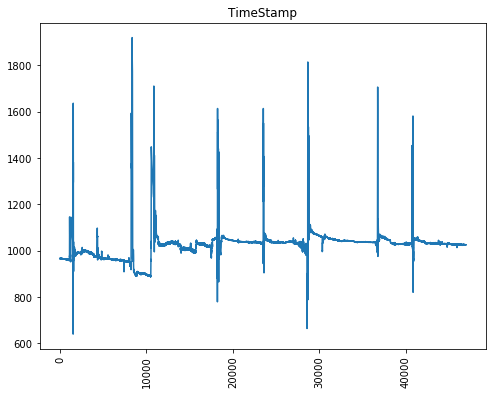

In [38]:
plt.plot(df1_5min.index.values, df1_5min[colnames1[1]])
plt.xticks(rotation=90)
plt.title(colnames1[0])
plt.show()

In [39]:
def batch_plot(my_df, colnames):
    n = len(colnames)
    count=0
    plt.figure(figsize=(20,n*7))#adjust to suit your monitor

    for colname in colnames[1:n]:
        print ("n:", n, type(n), ", count:", count, type(count))
        plt.subplot(n, 1, count+1)
        plt.plot(my_df.index.values, my_df[colname], 'ko-')
        plt.xlabel(colname)
        count +=1

    plt.show()    

n: 36 <class 'int'> , count: 0 <class 'int'>
n: 36 <class 'int'> , count: 1 <class 'int'>
n: 36 <class 'int'> , count: 2 <class 'int'>
n: 36 <class 'int'> , count: 3 <class 'int'>
n: 36 <class 'int'> , count: 4 <class 'int'>
n: 36 <class 'int'> , count: 5 <class 'int'>
n: 36 <class 'int'> , count: 6 <class 'int'>
n: 36 <class 'int'> , count: 7 <class 'int'>
n: 36 <class 'int'> , count: 8 <class 'int'>
n: 36 <class 'int'> , count: 9 <class 'int'>
n: 36 <class 'int'> , count: 10 <class 'int'>
n: 36 <class 'int'> , count: 11 <class 'int'>
n: 36 <class 'int'> , count: 12 <class 'int'>
n: 36 <class 'int'> , count: 13 <class 'int'>
n: 36 <class 'int'> , count: 14 <class 'int'>
n: 36 <class 'int'> , count: 15 <class 'int'>
n: 36 <class 'int'> , count: 16 <class 'int'>
n: 36 <class 'int'> , count: 17 <class 'int'>
n: 36 <class 'int'> , count: 18 <class 'int'>
n: 36 <class 'int'> , count: 19 <class 'int'>
n: 36 <class 'int'> , count: 20 <class 'int'>
n: 36 <class 'int'> , count: 21 <class 'int'

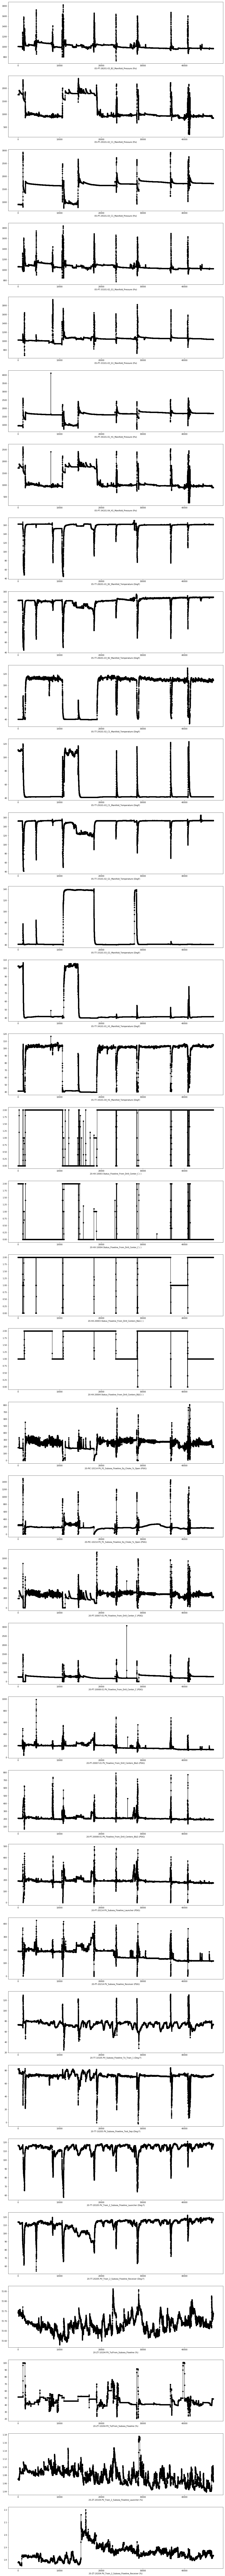

In [40]:
batch_plot(df1_5min, colnames1[1:-2])

In [41]:
# obviously columns 'PIIntTSTicks', 'PIIntShapeID' have no value and can be deleted.

In [42]:
#print (df2.shape)
#df2.drop(['PIIntTSTicks', 'PIIntShapeID'], axis=1, inplace=True)
#print (df2.shape)

(469441, 49)
(469441, 47)


In [43]:
colnames2 = list(df2)

In [44]:
df2_5min = df2.groupby(np.arange(len(df2))//10).mean()
print ("original shape:", df2.shape, ", new shape:", df2_5min.shape)


original shape: (469441, 47) , new shape: (46945, 46)


In [45]:
temp2 = df2[df2.index % 10 == 0][colnames2[0]]

In [46]:
temp2.shape

(46945,)

In [47]:
df2_5min[colnames2[0]] = np.array(list(temp2))

In [48]:
df2_5min.head(5)

,21-FQI-10518-01.NetRate.PV (BPD),21-FT-40518-03_Density_(Coriolis) (g/cc),21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d),21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%),21-HY-40534.OUT_Test_Separator_Inlet (%),21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%),21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%),21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%),21-LIC-40516.SP_Test_Allocation_Sep_Interface (%),21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%),...,30-PDIC-19104.SP_2nd_Stg_Prod_Hydrocyclone_Out ( ),30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),TimeStamp
0,11859.188574,0.841033,38175.948047,30.5,100.0,30.0,0.0,22.0,32.0,19.175389,...,1.0,10.911530,11.096327,0.964418,42.853490,3.196577,2.509931,0.000000,-0.091928,2016-10-20 00:00:00
1,12080.700391,0.841325,38415.228906,30.5,100.0,30.0,0.0,22.0,32.0,19.282924,...,1.0,12.666948,13.109638,0.966652,44.627969,3.254400,2.554051,0.000000,0.338183,2016-10-20 00:05:00
2,12278.154785,0.841448,38091.270703,30.5,100.0,30.0,0.0,22.0,32.0,19.367644,...,1.0,12.162533,12.231127,0.971018,45.286076,3.391381,2.713906,0.000000,0.347171,2016-10-20 00:10:00
3,11755.528320,0.841417,38279.237109,30.5,100.0,30.0,0.0,22.0,32.0,18.951120,...,1.0,11.306673,11.264754,0.975384,45.175800,3.529160,2.854485,0.000000,0.342287,2016-10-20 00:15:00
4,11584.259570,0.841110,38696.872656,30.5,100.0,30.0,0.0,22.0,32.0,18.833464,...,1.0,10.644278,10.533140,0.979750,44.751075,3.686519,3.056069,0.000427,0.342878,2016-10-20 00:20:00


n: 46 <class 'int'> , count: 0 <class 'int'>
n: 46 <class 'int'> , count: 1 <class 'int'>
n: 46 <class 'int'> , count: 2 <class 'int'>
n: 46 <class 'int'> , count: 3 <class 'int'>
n: 46 <class 'int'> , count: 4 <class 'int'>
n: 46 <class 'int'> , count: 5 <class 'int'>
n: 46 <class 'int'> , count: 6 <class 'int'>
n: 46 <class 'int'> , count: 7 <class 'int'>
n: 46 <class 'int'> , count: 8 <class 'int'>
n: 46 <class 'int'> , count: 9 <class 'int'>
n: 46 <class 'int'> , count: 10 <class 'int'>
n: 46 <class 'int'> , count: 11 <class 'int'>
n: 46 <class 'int'> , count: 12 <class 'int'>
n: 46 <class 'int'> , count: 13 <class 'int'>
n: 46 <class 'int'> , count: 14 <class 'int'>
n: 46 <class 'int'> , count: 15 <class 'int'>
n: 46 <class 'int'> , count: 16 <class 'int'>
n: 46 <class 'int'> , count: 17 <class 'int'>
n: 46 <class 'int'> , count: 18 <class 'int'>
n: 46 <class 'int'> , count: 19 <class 'int'>
n: 46 <class 'int'> , count: 20 <class 'int'>
n: 46 <class 'int'> , count: 21 <class 'int'

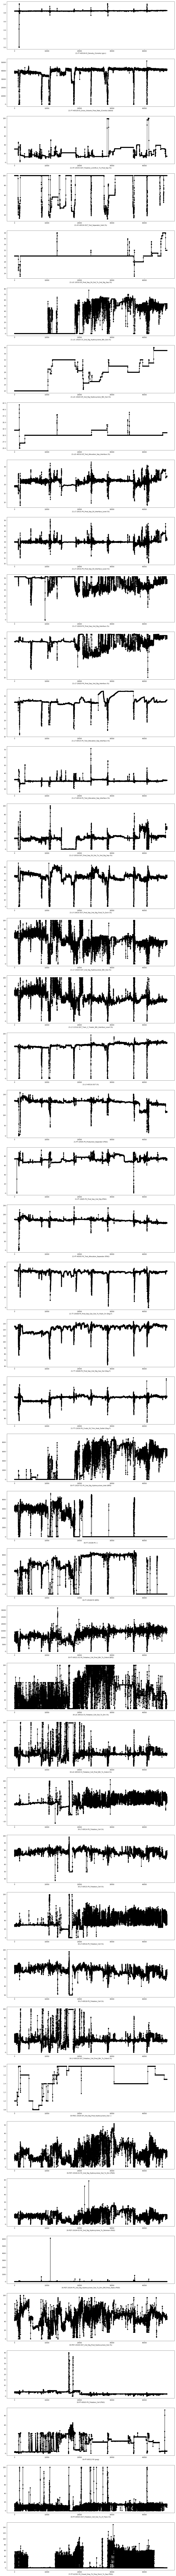

In [49]:
batch_plot(df2_5min, colnames2[1:])

In [50]:
#for colname in colnames2[1:]:
#    df2_5min[colnames2[1]].plot.hist(bins=100)
#for loop only displays last plot

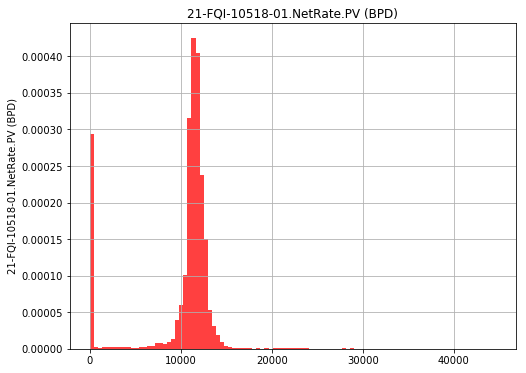

In [51]:
# the histogram of the data
n, bins, patches = plt.hist(list(df2_5min[colnames2[1]]), 100, normed=1, facecolor='red', alpha=0.75)
#plt.xlabel('Smarts')
plt.ylabel(colnames2[1])
plt.title(colnames2[1])
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

def batch_plot(my_df, colnames):
    n = len(colnames)
    print ("n:", n, type(n))
    count=0
    plt.figure(figsize=(20,n*7))#adjust to suit your monitor

    for colname in colnames[1:n]:
        count +=1
        print ("colname:", colname, ", count:", count, type(count))
        temp = str(n)+"1"+str(count)
        print ("temp:", temp)
        plt.subplot(n, 1, count)
        # the histogram of the data
        print ("xxxxxx")
        n, bins, patches = plt.hist(list(my_df[colname]), 100, normed=1, facecolor='red', alpha=0.75)
        #plt.xlabel('Smarts')
        plt.ylabel(colname)
        plt.title(colname)
        #plt.axis([40, 160, 0, 0.03])
        plt.grid(True)
        
        print ("end___________colname:", colname)

    plt.show()    

In [52]:
def plot_helper(my_df, colname):
    plt.close
    plt.figure(figsize=(20,7))#adjust to suit your monitor
    #print ("colname:", colname)
    n, bins, patches = plt.hist(list(my_df[colname]), 100, normed=1, facecolor='red', alpha=0.75)
    plt.ylabel(colname)
    plt.title(colname)
    plt.grid(True)
    #print ("end___________colname:", colname)
    plt.show()    

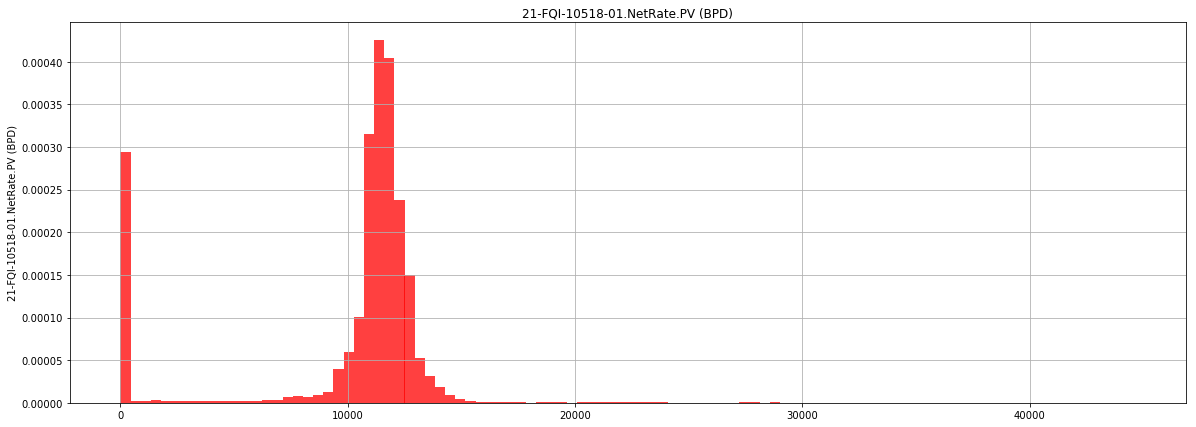

In [53]:
plot_helper(df2_5min, colnames2[1])

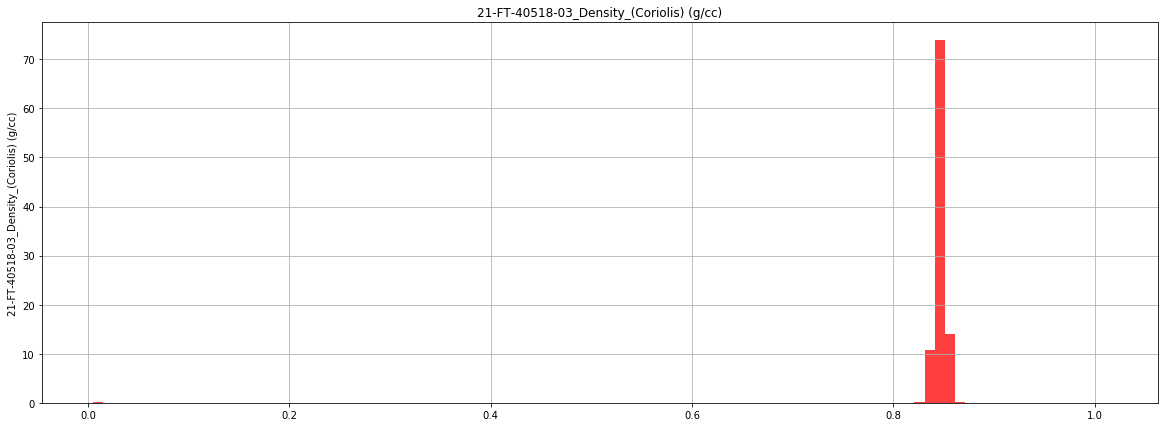

In [54]:
plot_helper(df2_5min, colnames2[2])

In [55]:
#create column measuring rate of change over adjacent rows.
#avoid for loops 

In [58]:
df2_5min_colnames = list(df2_5min)
df2_5min_colnames[0], df2_5min_colnames[1], df2_5min_colnames[2]

('21-FQI-10518-01.NetRate.PV (BPD)',
 '21-FT-40518-03_Density_(Coriolis) (g/cc)',
 '21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)')

In [59]:
for colname in df2_5min_colnames[:-1]:
    #-1 since last colname is TimeStamp.
    print ("colname:", colname)
    df2_5min[colname+"_diff1"] = df2_5min[colname].diff(periods=1)
    df2_5min[colname+"_diff2"] = df2_5min[colname].diff(periods=2)

colname: 21-FQI-10518-01.NetRate.PV (BPD)
colname: 21-FT-40518-03_Density_(Coriolis) (g/cc)
colname: 21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)
colname: 21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)
colname: 21-HY-40534.OUT_Test_Separator_Inlet (%)
colname: 21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)
colname: 21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)
colname: 21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)
colname: 21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)
colname: 21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)
colname: 21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)
colname: 21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)
colname: 21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)
colname: 21-LT-40515.PV_Test_Allocation_Sep_Interface (%)
colname: 21-LT-40516.PV_Test_Allocation_Sep_Interface (%)
colname: 21-LY-10516.OUT_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)
colname: 21-LY-10616.OUT_Prod_Sep_2nd_Stg_Fluid_To_Exch (%)
colname: 21-LY-10620.OUT_2nd_Stg_Hy

In [60]:
df2_5min.shape

(46945, 139)

In [61]:
#df2_5min.drop('TimeStamp_diff1', axis=1, inplace=True)

In [62]:
list(df2_5min)

['21-FQI-10518-01.NetRate.PV (BPD)',
 '21-FT-40518-03_Density_(Coriolis) (g/cc)',
 '21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)',
 '21-HY-10535.OUT_Flowline_Lchr/Rcvr_To_Prod_Sep (%)',
 '21-HY-40534.OUT_Test_Separator_Inlet (%)',
 '21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LIC-10620.CV_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)',
 '21-LT-10515.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)',
 '21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)',
 '21-LT-40515.PV_Test_Allocation_Sep_Interface (%)',
 '21-LT-40516.PV_Test_Allocation_Sep_Interface (%)',
 '21-LY-10516.OUT_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)',
 '21-LY-10616.OUT_Prod_Sep_2nd_Stg_Fluid_To_Exch (%)',
 '21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)',
 '21-LY-11516.OUT_Train_1_Treater_Wtr_Interface_Level (%)',
 '21-LY

In [ ]:
batch_plot(df2_5min, colnames)

In [ ]:
def batch_plot_diff(my_df, colnames):
    n = len(colnames)
    count=0
    plt.figure(figsize=(20,n*7))#adjust to suit your monitor

    for colname in colnames[1:n]:
        print ("n:", n, type(n), ", count:", count, type(count))
        plt.subplot(n, 1, count+1)
        plt.plot(my_df.index.values, my_df[colname], 'ko-')
        plt.xlabel(colname)
        count +=1

    plt.show()    